In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [2]:
df = pd.read_excel('Input/Traffic_Dummy.xlsb', engine='pyxlsb')

df.shape

(16674, 30)

### Preprocessing Data

In [3]:
df.shape

(16674, 30)

In [4]:
df.isnull().sum()

System                 0
Type                   0
Link                   0
Link Vice Versa        0
COUNTIF                0
LEN                    0
ResourceName+IP        0
ResourceName           0
Towerid NE             0
IPAddress NE       16674
FE ResourceName        0
Towerid FE             0
IPAddress FE       16674
Week                   0
Region                 0
Kabupaten              0
Province               0
D1                   344
D2                   367
D3                   370
D4                   313
D5                   337
D6                   318
D7                   270
MaxUtil                0
TXUtilization         14
Bandwidth(Kbps)      771
TotalHit               0
Category               0
IP address             0
dtype: int64

In [5]:
# Selected Column with Least Null

df_master = df[['Type','Link','Towerid NE','Towerid FE','Week','LEN','COUNTIF','ResourceName','D1','D2','D3','D4','D5','D6','D7','MaxUtil','TXUtilization', 'Bandwidth(Kbps)', 'TotalHit', 'Category']]
df_master.isnull().sum(),


(Type                 0
 Link                 0
 Towerid NE           0
 Towerid FE           0
 Week                 0
 LEN                  0
 COUNTIF              0
 ResourceName         0
 D1                 344
 D2                 367
 D3                 370
 D4                 313
 D5                 337
 D6                 318
 D7                 270
 MaxUtil              0
 TXUtilization       14
 Bandwidth(Kbps)    771
 TotalHit             0
 Category             0
 dtype: int64,)

In [6]:
# Filling Missing Value 
warnings.filterwarnings("ignore")
df_master['D1'].interpolate(method='linear', inplace=True)
df_master['D2'].interpolate(method='linear', inplace=True)
df_master['D3'].interpolate(method='linear', inplace=True)
df_master['D4'].interpolate(method='linear', inplace=True)
df_master['D5'].interpolate(method='linear', inplace=True)
df_master['D6'].interpolate(method='linear', inplace=True)
df_master['D7'].interpolate(method='linear', inplace=True)
df_master['Bandwidth(Kbps)'] = df_master['Bandwidth(Kbps)'].fillna(df_master['Bandwidth(Kbps)'].median())

df_master.dropna(subset=['TXUtilization'], inplace=True)

df_master.isnull().sum()


Type               0
Link               0
Towerid NE         0
Towerid FE         0
Week               0
LEN                0
COUNTIF            0
ResourceName       0
D1                 0
D2                 0
D3                 0
D4                 0
D5                 0
D6                 0
D7                 0
MaxUtil            0
TXUtilization      0
Bandwidth(Kbps)    0
TotalHit           0
Category           0
dtype: int64

In [7]:
df_master.dtypes

Type                object
Link                object
Towerid NE          object
Towerid FE          object
Week                 int64
LEN                  int64
COUNTIF              int64
ResourceName        object
D1                 float64
D2                 float64
D3                 float64
D4                 float64
D5                 float64
D6                 float64
D7                 float64
MaxUtil            float64
TXUtilization      float64
Bandwidth(Kbps)    float64
TotalHit             int64
Category            object
dtype: object

In [8]:
lb = LabelEncoder()

# Get Column non Numerical
cat_cols = [col for col in df_master.columns if df_master[col].dtype == 'object']

for col in cat_cols:
    df_master[col] = lb.fit_transform(df_master[col])

df_master.dtypes

Type                 int32
Link                 int32
Towerid NE           int32
Towerid FE           int32
Week                 int64
LEN                  int64
COUNTIF              int64
ResourceName         int32
D1                 float64
D2                 float64
D3                 float64
D4                 float64
D5                 float64
D6                 float64
D7                 float64
MaxUtil            float64
TXUtilization      float64
Bandwidth(Kbps)    float64
TotalHit             int64
Category             int32
dtype: object

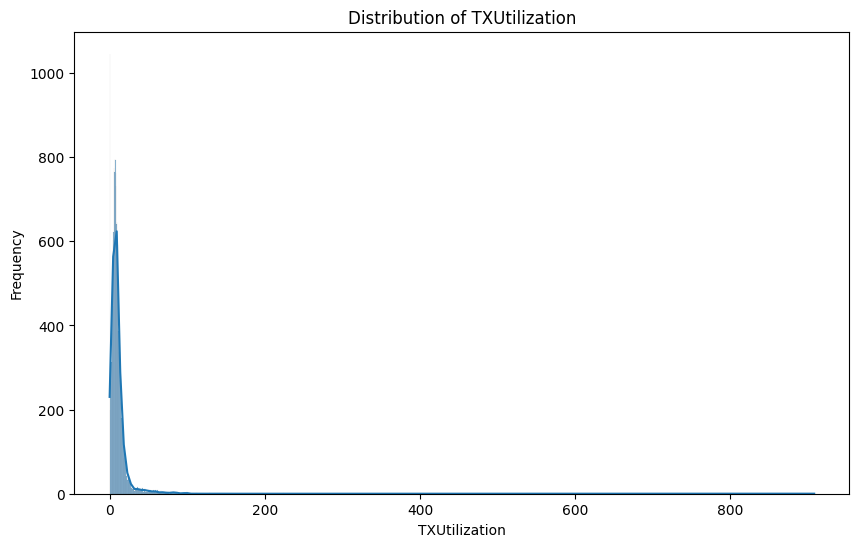

In [9]:
#  Hist Plot
plt.figure(figsize=(10, 6))
sns.histplot(df['TXUtilization'], kde=True)
plt.title('Distribution of TXUtilization')
plt.xlabel('TXUtilization')
plt.ylabel('Frequency')
plt.show()

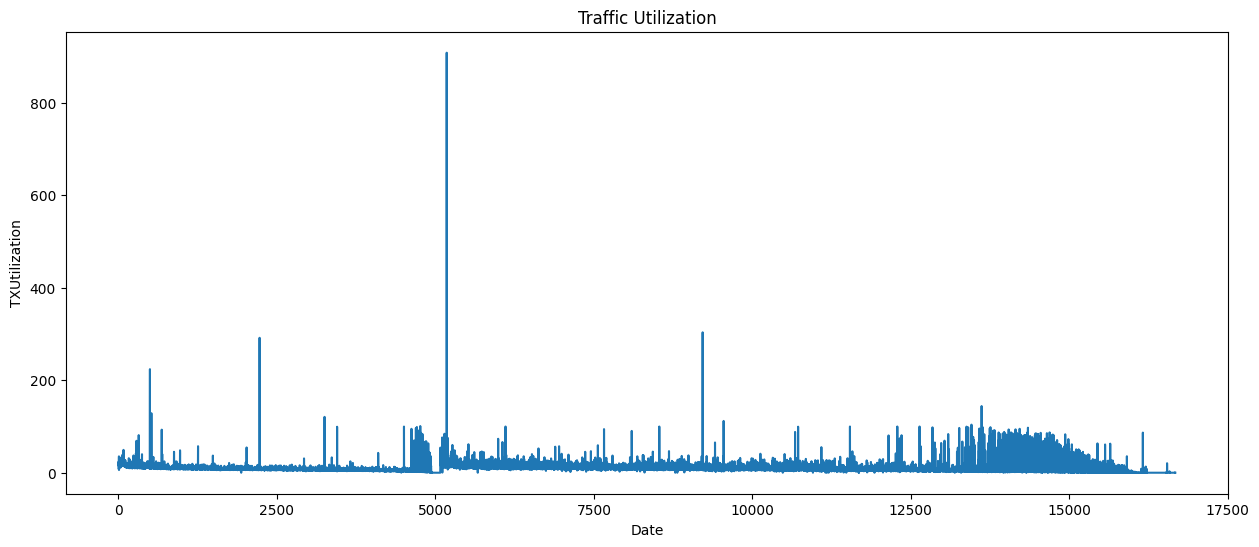

In [10]:
plt.figure(figsize=(15,6))
plt.title("Traffic Utilization")
plt.plot(df_master['TXUtilization'])
plt.xlabel('Date')
plt.ylabel("TXUtilization")
plt.show()

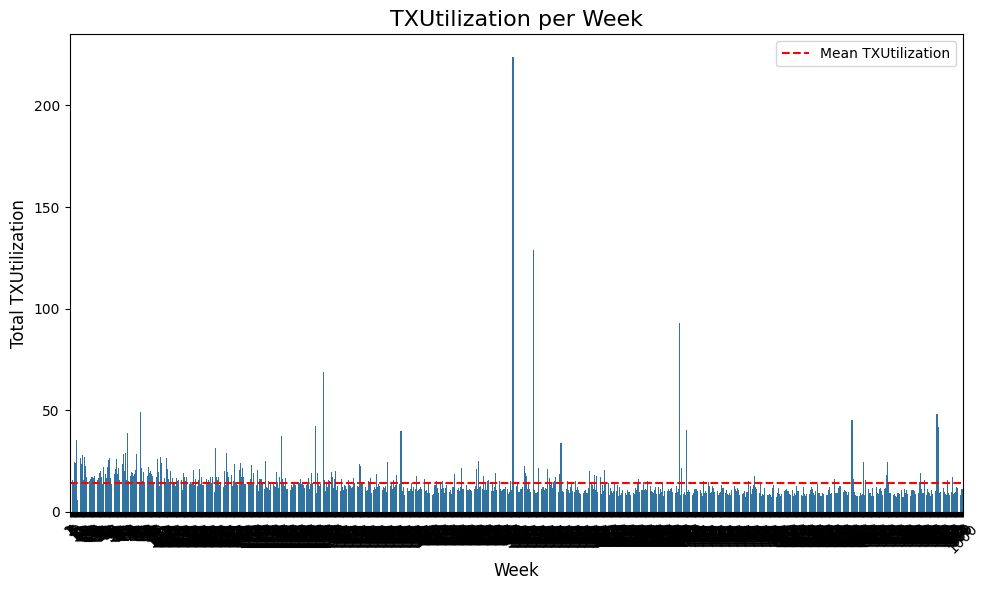

In [11]:
monthly_demand = df_master[0:1000].groupby('Week')['TXUtilization'].sum()

mean = monthly_demand.mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_demand.index, y=monthly_demand.values)
plt.axhline(mean, color='red', linestyle='--', label='Mean TXUtilization')

plt.title('TXUtilization per Week', fontsize=16)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Total TXUtilization', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


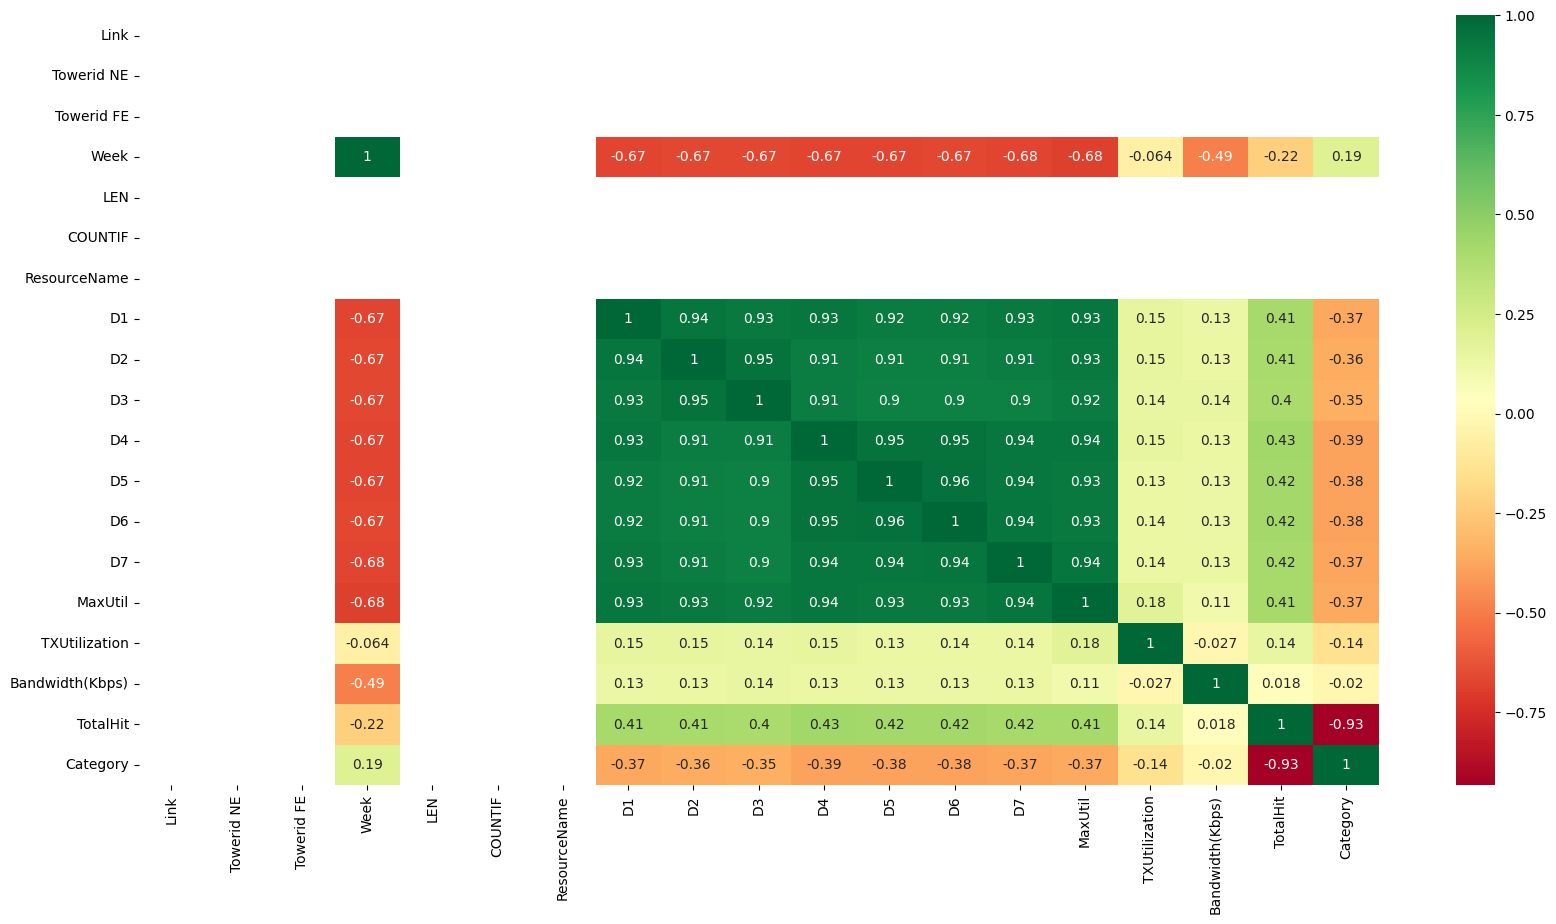

In [12]:
fig = plt.figure(figsize=(20,10))
corrMatrix = df_master[df_master.columns[1:]].corr()

sns.heatmap(corrMatrix,annot=True,cmap ='RdYlGn')
plt.show()

In [13]:
# Selected Column

df_final = df[['D1','D2','D3','D4','D5','D6','D7','TXUtilization']]
df_final.head(1)


,D1,D2,D3,D4,D5,D6,D7,TXUtilization
0,72.370003,75.730003,77.43,75.370003,79.010002,100.0,100.0,9.72


In [14]:
# Filling Missing Value 
warnings.filterwarnings("ignore")
df_final['D1'].interpolate(method='linear', inplace=True)
df_final['D2'].interpolate(method='linear', inplace=True)
df_final['D3'].interpolate(method='linear', inplace=True)
df_final['D4'].interpolate(method='linear', inplace=True)
df_final['D5'].interpolate(method='linear', inplace=True)
df_final['D6'].interpolate(method='linear', inplace=True)
df_final['D7'].interpolate(method='linear', inplace=True)
df_final.dropna(subset=['TXUtilization'], inplace=True)

df_final.isnull().sum()


D1               0
D2               0
D3               0
D4               0
D5               0
D6               0
D7               0
TXUtilization    0
dtype: int64

In [15]:
import math

utilization_data = df_final.filter(['TXUtilization'])

# Changing to List
utilization_data_list = utilization_data.values

# Define Training Set 80%
training_data_len = math.ceil(len(utilization_data_list) * .8)
timestamp_windows = 70

In [16]:
utilization_data_list

array([[ 9.72000027],
       [23.62999916],
       [16.48999977],
       ...,
       [ 0.        ],
       [ 0.        ],
       [ 0.        ]])

In [17]:
from sklearn.preprocessing import MinMaxScaler

#Scale Data 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(utilization_data_list)

scaled_data[1:5]

array([[0.02602797],
       [0.0181634 ],
       [0.01728222],
       [0.01590537]])

### Model Creation

In [18]:
import tensorflow as tf
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
train_data = scaled_data[0 : training_data_len, :]


# Create X_train and y_train
X_train = []
y_train = []


for i in range(timestamp_windows, len(train_data)):
    X_train.append(train_data[i - timestamp_windows : i, 0])
    y_train.append(train_data[i, 0])

In [20]:
# create the testing dataset
test_data = scaled_data[training_data_len - timestamp_windows : , :]


# create X_test and y_test
X_test = []
y_test = scaled_data[training_data_len : , :]
for i in range(timestamp_windows, len(test_data)):
    X_test.append(test_data[i - timestamp_windows : i, 0])

In [21]:
#Convert to array
x_train,y_train = np.array(X_train), np.array(y_train)
x_test,y_test = np.array(X_test), np.array(y_test)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

print(f'Training : {x_train.shape}, Test : {x_test.shape}')

Training : (13258, 70, 1), Test : (3332, 70, 1)


In [22]:
model = Sequential()
model.add(LSTM(60, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(x_train.shape[2]))

early_stopping = EarlyStopping(monitor='mae', patience=5, restore_best_weights=True)
model.compile(optimizer="adam", loss="mean_squared_error", metrics=['mae'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 70, 60)         │        14,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 256)            │       324,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 382,753 (1.46 MB)

 Trainable params: 382,753 (1.46 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(
    x_train, y_train,
    epochs=50, 
    batch_size=30,
    callbacks=[early_stopping],  
    verbose=1 
)

Epoch 1/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 50s 102ms/step - loss: 1.3893e-04 - mae: 0.0067
Epoch 2/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 42s 95ms/step - loss: 1.4802e-04 - mae: 0.0054
Epoch 3/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 43s 96ms/step - loss: 1.0482e-04 - mae: 0.0050
Epoch 4/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 43s 97ms/step - loss: 9.8977e-05 - mae: 0.0049
Epoch 5/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 44s 99ms/step - loss: 2.7022e-04 - mae: 0.0056
Epoch 6/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 42s 94ms/step - loss: 1.8870e-04 - mae: 0.0056
Epoch 7/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 39s 89ms/step - loss: 2.1775e-04 - mae: 0.0053
Epoch 8/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 40s 91ms/step - loss: 1.8290e-04 - mae: 0.0050
Epoch 9/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 38s 85ms/step - loss: 2.1651e-04 - mae: 0.0050
Epoch 10/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 37s 83ms/step - loss: 1.1393e-04 - mae: 0.0050
Epoch 11/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 42s 96ms/step - loss: 1.5200e-04 - mae: 0.0049
Epoch 12/50
442/442 ━━━━━━━━━━━━━━━━━━━━

In [24]:
# predict with LSTM model
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step


In [26]:
#  Model Quality

mse = np.mean((y_test - predictions) ** 2)
rmse = np.sqrt(np.mean(y_test - predictions)**2)

mad = np.mean(np.abs(y_test - predictions))
tracking_signal = np.sum(y_test - predictions) / mad
print(f"Tracking Signal: {tracking_signal}")

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Tracking Signal: -3332.0
Mean Squared Error (MSE): 182.8356725780285
Root Mean Squared Error (RMSE): 13.196052316787341


<function matplotlib.pyplot.show(close=None, block=None)>

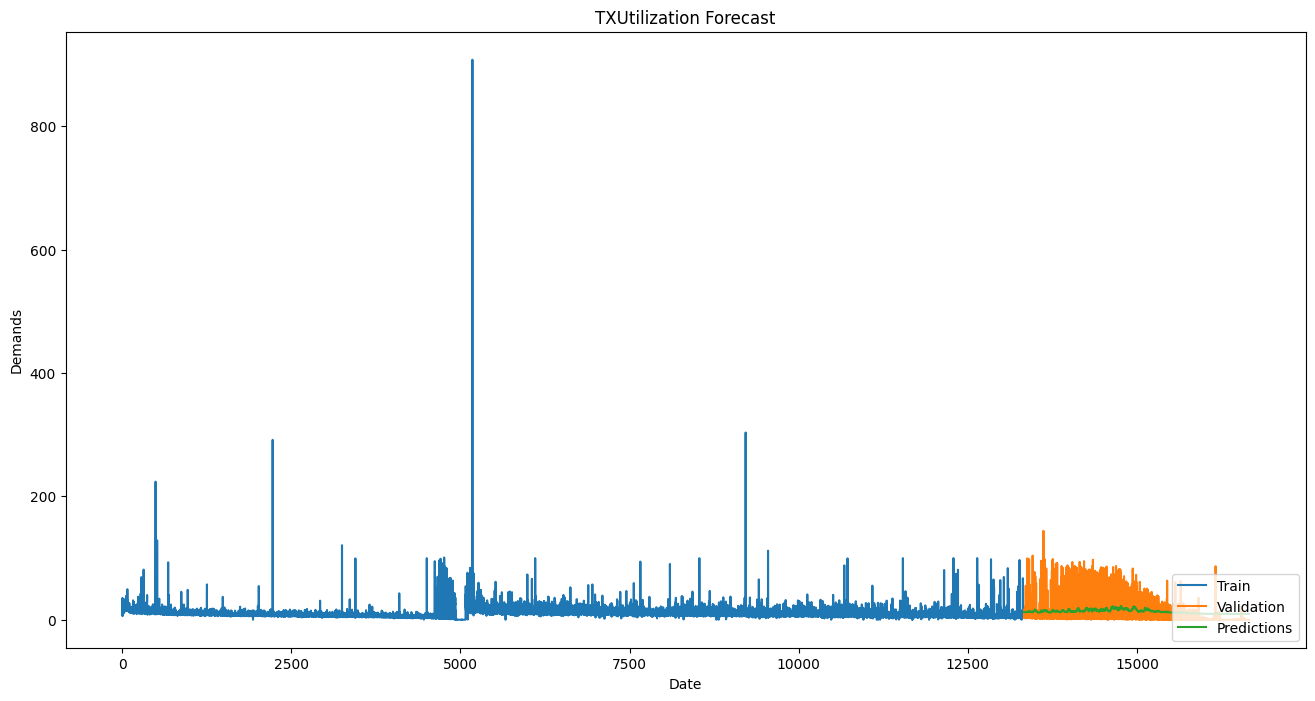

In [28]:
train = df[:training_data_len]

# Testing Data Defined at Len(Train) - (Len(Train) + Training Size)
valid = df[training_data_len:]
valid = valid[0:3332]
valid = valid.copy()
valid.loc[:, 'Predictions'] = predictions

#Plot
plt.figure(figsize=(16,8))
plt.title('TXUtilization Forecast')
plt.xlabel('Date')
plt.ylabel('Demands')
plt.plot(train["TXUtilization"])
plt.plot(valid[["TXUtilization",'Predictions']])
plt.legend(['Train','Validation','Predictions'], loc='lower right')
plt.show 

In [29]:
model.save('Output Model/Capacity Forecast/lstm_capacity_model.h5')